In [ ]:
import pandas as pd

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import tree

In [ ]:
# Convert features and target to a DataFrame for better inspection
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Print the first few rows of the dataset
print(X_df.head())
print(y_df.head())

# Print the column names
print(X_df.columns)
print(y_df.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  
    y
0  no
1  no
2  no
3  no
4  no
Index(['age', 'job', 'marital', 'education', 'default', '

Accuracy: 0.8698761427307579
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.45      0.46      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

Confusion Matrix:
 [[11071   895]
 [  870   728]]
Feature Importance:
age: 0.1105
balance: 0.1200
duration: 0.2982
campaign: 0.0354
pdays: 0.0544
previous: 0.0155
job_admin.: 0.0090
job_blue-collar: 0.0067
job_entrepreneur: 0.0026
job_housemaid: 0.0026
job_management: 0.0089
job_retired: 0.0029
job_self-employed: 0.0046
job_services: 0.0086
job_student: 0.0034
job_technician: 0.0096
job_unemployed: 0.0044
marital_divorced: 0.0074
marital_married: 0.0092
marital_single: 0.0075
education_primary: 0.0062
education_secondary: 0.0106
education_tertiary: 0.0086
housing_no: 0.0091
housing_yes: 0.0118
loan_no: 0.0057
loa

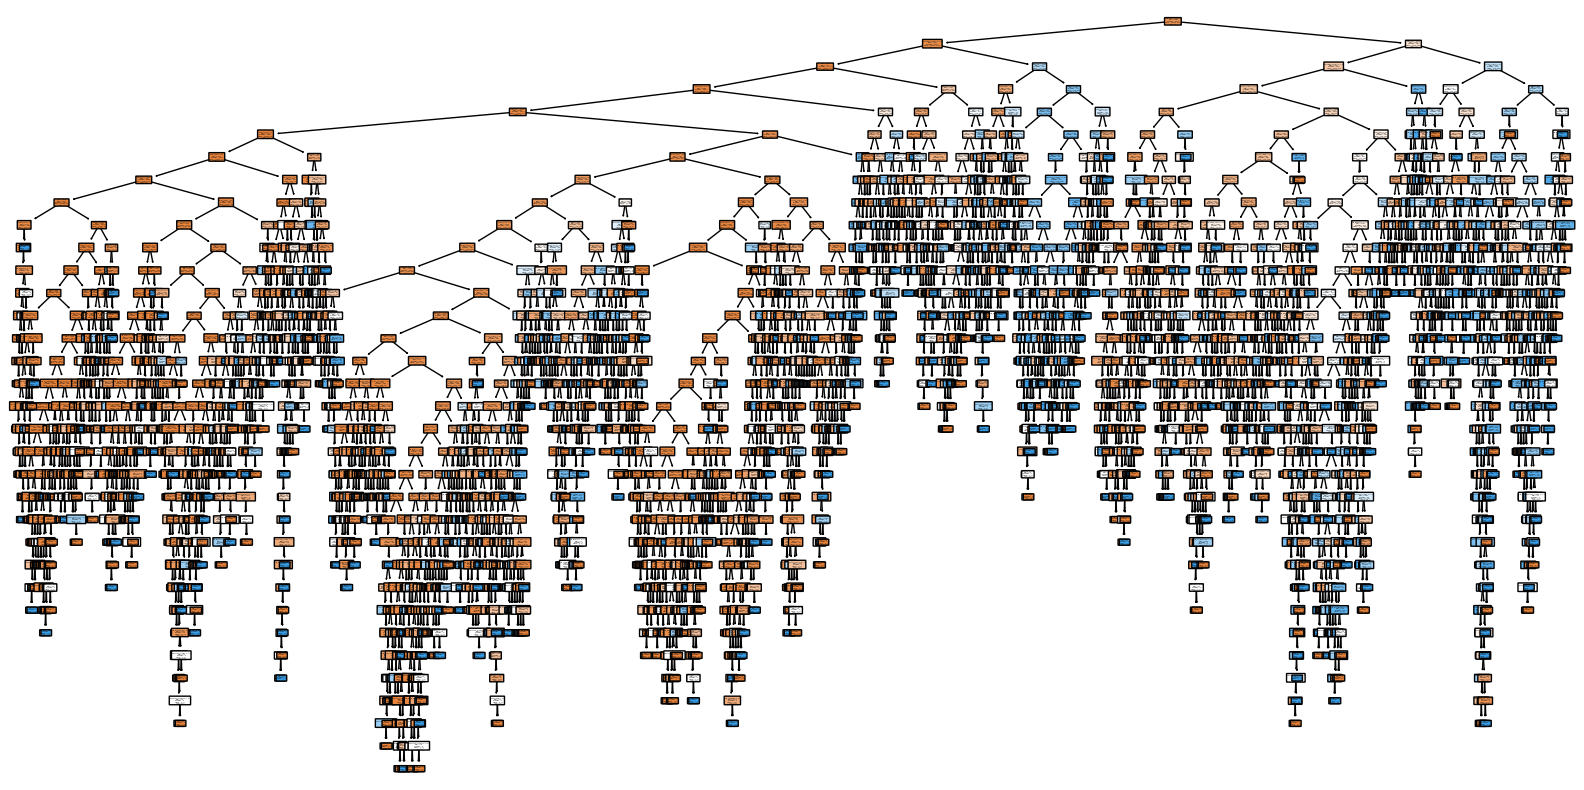

In [ ]:
# Define features (adjust these names if they do not match exactly)
feature_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
                   'loan', 'contact',  'month', 'duration', 'campaign',
                   'pdays', 'previous', 'poutcome']

# Since the target might be named differently, ensure it matches correctly
target_column = 'y'  # This might be 'purchase' or something similar

# Assign features and target variables
X = X_df[feature_columns]
y = y_df[target_column]

# Encode categorical variables
X = pd.get_dummies(X)

# Check if the target needs encoding (assuming binary classification)
if y.dtype == 'object':
    y = pd.get_dummies(y, drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = model.feature_importances_
features_list = X.columns

print("Feature Importance:")
for feature, importance in zip(features_list, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=features_list, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()




In [ ]:
# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Get the probability for a specific customer (example: first customer in the test set)
customer_index = 1  # Index of the customer in the test set
customer_probability = y_prob[customer_index]

print(f"Probability that the customer will take the service: {customer_probability:.2f}")

Probability that the customer will take the service: 0.00
